In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras import layers
from sklearn.datasets import make_blobs

from keras.models import Sequential
from keras.layers import Input, Dense, Activation,GaussianNoise
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

<font size=5>gene expression dataset</font>

In [1185]:
df1 = pd.read_csv('data/df_transpose.csv',sep=';')
df1.head()

,Unnamed: 0,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,normalized_count_TCGA.CF.A1HS.01A.11R.A13Y.07,0.0,3.5684,5.3975,211.2791,1456.6647,0,49.6115,0.5977,0.0000,...,37.0592,300.6575,1343.0962,84.8775,1457.2624,3380.7531,714.2857,491.3329,9.5637,0.0000
1,normalized_count_TCGA.GD.A3OQ.11A.21R.A220.07,0.0,40.8452,19.1380,128.4473,646.4851,0,253.2622,0.3332,0.0000,...,77.3116,618.1597,1433.2642,13.9961,1333.9587,4102.5145,1777.8341,784.7796,146.6255,0.6665
2,normalized_count_TCGA.ZF.A9R2.01A.11R.A39I.07,0.0,8.7008,11.4256,158.9524,687.9112,0,275.0613,1.0321,0.0000,...,46.9617,561.9920,1369.1137,1.0321,967.1010,5342.2784,1057.9280,757.5797,0.0000,0.0000
3,normalized_count_TCGA.KQ.A41N.01A.11R.A33J.07,0.0,1.1469,2.7191,66.2371,1281.5722,0,695.8763,1.9330,9.0206,...,18.0412,252.5773,1297.0361,305.4124,1706.1856,3100.5155,471.6495,484.5361,9.0206,0.0000
4,normalized_count_TCGA.GC.A6I3.11A.11R.A31N.07,0.0,0.0000,5.3121,95.2855,1551.7928,0,291.5007,0.0000,0.0000,...,32.5365,250.9960,699.2032,25.8964,305.4449,6234.3958,811.4210,281.5405,16.6003,0.0000


In [1186]:
df1.shape

(427, 20532)

In [1187]:
# rename the first column as barcode
df1.rename(columns = {"Unnamed: 0":"barcode"},inplace = True)

In [1188]:
df1

,barcode,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,normalized_count_TCGA.CF.A1HS.01A.11R.A13Y.07,0.0,3.5684,5.3975,211.2791,1456.6647,0,49.6115,0.5977,0.0000,...,37.0592,300.6575,1343.0962,84.8775,1457.2624,3380.7531,714.2857,491.3329,9.5637,0.0000
1,normalized_count_TCGA.GD.A3OQ.11A.21R.A220.07,0.0,40.8452,19.1380,128.4473,646.4851,0,253.2622,0.3332,0.0000,...,77.3116,618.1597,1433.2642,13.9961,1333.9587,4102.5145,1777.8341,784.7796,146.6255,0.6665
2,normalized_count_TCGA.ZF.A9R2.01A.11R.A39I.07,0.0,8.7008,11.4256,158.9524,687.9112,0,275.0613,1.0321,0.0000,...,46.9617,561.9920,1369.1137,1.0321,967.1010,5342.2784,1057.9280,757.5797,0.0000,0.0000
3,normalized_count_TCGA.KQ.A41N.01A.11R.A33J.07,0.0,1.1469,2.7191,66.2371,1281.5722,0,695.8763,1.9330,9.0206,...,18.0412,252.5773,1297.0361,305.4124,1706.1856,3100.5155,471.6495,484.5361,9.0206,0.0000
4,normalized_count_TCGA.GC.A6I3.11A.11R.A31N.07,0.0,0.0000,5.3121,95.2855,1551.7928,0,291.5007,0.0000,0.0000,...,32.5365,250.9960,699.2032,25.8964,305.4449,6234.3958,811.4210,281.5405,16.6003,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,normalized_count_TCGA.DK.A2I4.01A.11R.A21D.07,0.0,13.9669,15.2733,140.3251,762.4232,0,139.9798,0.0000,0.0000,...,44.1714,304.8449,837.3902,2.1775,960.2613,5215.9577,1085.9320,863.5197,15.5533,0.0000
423,normalized_count_TCGA.BT.A42E.01A.11R.A23W.07,0.0,5.1577,7.7255,146.1750,1632.6077,0,276.3216,0.4442,0.0000,...,34.2070,258.9960,1278.9871,75.5220,731.6748,5631.2750,608.1741,677.9209,6.6637,0.0000
424,normalized_count_TCGA.DK.AA6U.01A.11R.A39I.07,0.0,14.1142,23.3695,161.8944,720.5970,0,308.6271,0.0000,0.0000,...,30.1271,321.5887,1228.9034,20.6686,814.8316,2229.4017,1462.9135,674.0052,8.7579,0.0000
425,normalized_count_TCGA.XF.A9T2.01A.11R.A42T.07,0.0,11.8567,11.7059,165.2403,1167.7663,0,242.2243,0.0000,0.0000,...,19.7926,303.4873,1093.3082,3.7700,657.8699,4131.0085,953.8172,737.0405,57.4929,0.0000


<font size=5>Patient dataset</font>

In [5]:
df2 = pd.read_csv('../data/patient_gene_expression.csv',sep=';')
df2.shape

(427, 238)

In [6]:
# choose diagnosis
Y = df2[['primary_diagnosis']]
# Y

distribution of data is
 Transitional cell carcinoma              358
Papillary transitional cell carcinoma     66
Papillary adenocarcinoma, NOS              1
Carcinoma, NOS                             1
Name: primary_diagnosis, dtype: int64


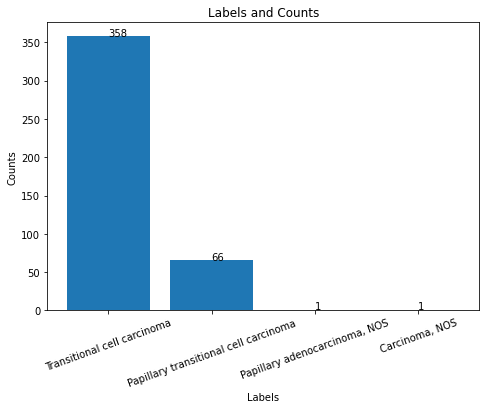

In [1246]:
# check number of cancer type
print('distribution of data is' +'\n', Y["primary_diagnosis"].value_counts())
# ploting
counts = Y['primary_diagnosis'].value_counts().rename_axis('Cancer_type').reset_index(name='count')
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(counts['Cancer_type'],counts['count'])
addlabels(counts['Cancer_type'],counts['count'])
plt.title("Labels and Counts")
# giving X and Y labels
plt.xlabel("Labels")
plt.ylabel("Counts")
plt.xticks(rotation=20)
plt.show()

In [1251]:
# Solution2: delete the labels with only one sample
# for index,row in Y.iterrows():
#     if row['primary_diagnosis']== 'Squamous cell carcinoma, NOS' or row['primary_diagnosis']== 'Papillary adenocarcinoma, NOS' or row['primary_diagnosis']== 'Carcinoma, NOS':
#         Y = Y.drop(index)
#         df1 = df1.drop(index)

In [ ]:
# solution3: merge the labels that only have one sample
# for index,row in Y.iterrows():
#     if row['primary_diagnosis']== 'Squamous cell carcinoma, NOS' or row['primary_diagnosis']== 'Papillary adenocarcinoma, NOS' or row['primary_diagnosis']== 'Carcinoma, NOS':
#         row['primary_diagnosis'] = 'NOS'

In [1192]:
# transform the labels
ord_enc = OrdinalEncoder()
Y["classes"] = ord_enc.fit_transform(Y)
Y

,primary_diagnosis,classes
0,"Squamous cell carcinoma, NOS",3.0
1,Transitional cell carcinoma,4.0
2,Papillary transitional cell carcinoma,2.0
3,Transitional cell carcinoma,4.0
4,Transitional cell carcinoma,4.0
...,...,...
422,Papillary transitional cell carcinoma,2.0
423,Papillary transitional cell carcinoma,2.0
424,Transitional cell carcinoma,4.0
425,Transitional cell carcinoma,4.0


In [1193]:
classes=Y["classes"]
labels = np_utils.to_categorical(classes)
print(labels[:10])

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [1194]:
X= df1.drop(columns='barcode')
X

,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,?|280660,?|317712,...,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,0.0,3.5684,5.3975,211.2791,1456.6647,0,49.6115,0.5977,0.0000,0,...,37.0592,300.6575,1343.0962,84.8775,1457.2624,3380.7531,714.2857,491.3329,9.5637,0.0000
1,0.0,40.8452,19.1380,128.4473,646.4851,0,253.2622,0.3332,0.0000,0,...,77.3116,618.1597,1433.2642,13.9961,1333.9587,4102.5145,1777.8341,784.7796,146.6255,0.6665
2,0.0,8.7008,11.4256,158.9524,687.9112,0,275.0613,1.0321,0.0000,0,...,46.9617,561.9920,1369.1137,1.0321,967.1010,5342.2784,1057.9280,757.5797,0.0000,0.0000
3,0.0,1.1469,2.7191,66.2371,1281.5722,0,695.8763,1.9330,9.0206,0,...,18.0412,252.5773,1297.0361,305.4124,1706.1856,3100.5155,471.6495,484.5361,9.0206,0.0000
4,0.0,0.0000,5.3121,95.2855,1551.7928,0,291.5007,0.0000,0.0000,0,...,32.5365,250.9960,699.2032,25.8964,305.4449,6234.3958,811.4210,281.5405,16.6003,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,0.0,13.9669,15.2733,140.3251,762.4232,0,139.9798,0.0000,0.0000,0,...,44.1714,304.8449,837.3902,2.1775,960.2613,5215.9577,1085.9320,863.5197,15.5533,0.0000
423,0.0,5.1577,7.7255,146.1750,1632.6077,0,276.3216,0.4442,0.0000,0,...,34.2070,258.9960,1278.9871,75.5220,731.6748,5631.2750,608.1741,677.9209,6.6637,0.0000
424,0.0,14.1142,23.3695,161.8944,720.5970,0,308.6271,0.0000,0.0000,0,...,30.1271,321.5887,1228.9034,20.6686,814.8316,2229.4017,1462.9135,674.0052,8.7579,0.0000
425,0.0,11.8567,11.7059,165.2403,1167.7663,0,242.2243,0.0000,0.0000,0,...,19.7926,303.4873,1093.3082,3.7700,657.8699,4131.0085,953.8172,737.0405,57.4929,0.0000


In [1195]:
# delete the columns that contains all the same value
X1 = X[[c for c in list(X)
       if len(X[c].unique())>1]]
len(X1.columns)

20241

In [1196]:
# check the number of Nas
X1.isna().sum().sum()

0

In [1199]:
X2 = X1[[c for c in list(X1)
       if (X1[c]==0).sum()/len(X1)<=0.10]]
X2.shape

(427, 15443)

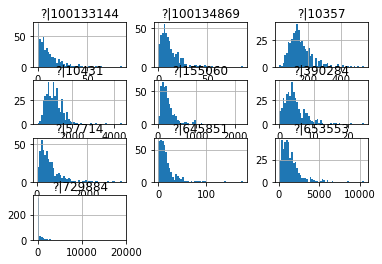

In [1250]:
#Plot a histogram for the first 30 features
sub_X2 = X2.iloc[:,:10]
sub_X2.hist(bins=50)
plt.show()

In [1225]:
########## normalization ###########
scaler =  preprocessing.StandardScaler().fit(X2)
data = scaler.transform(X2)

In [1226]:
data.shape

(427, 15443)

In [1227]:
# visulaize the data before scaler
# plt.scatter(X2.iloc[:,100],X2.iloc[:,120],c=classes)

In [1228]:
#after scaler
plt.scatter(data[:,2],data[:,5],c=classes)

In [1229]:
#Data spliting
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42) 
print(y_train.shape)
print(x_train.shape)
print(x_train.shape[1])

(298, 5)
(298, 15443)
15443


<font size=5>Building the model</font>

In [1231]:
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.layers import Dropout
from keras import regularizers
def creat_model():
    # lambda_l1 = 0.001
    # opt = Adam(lr=0.1)
    opt = 'SGD'
    # Create & train the Deep MLP model with 5 hidden layers  
    model = Sequential()

    # Add the hidden layers and the regulizers
    nb_features = data.shape[1]
    
    ############## input layer ############
    # simple one
    model.add(Dense(10,input_dim = nb_features,activation='relu'))
    # with regularizer 
    # model.add(Dense(10,input_dim = nb_features, activation='relu',kernel_regularizer = regularizers.l1(lambda_l1)))
    # with weight initialization
    # model.add(Dense(10,input_dim = nb_features,activation='relu',kernel_initializer='uniform'))
    # add noise
    # model.add(GaussianNoise(0.1))
    
    ######## hidden layer 1 ###########
    # simple one
    model.add(Dense(8, activation='relu'))
    # with regularizer 
    # model.add(Dense(8, activation='relu',kernel_regularizer=regularizers.l2(lambda_l1)))
    # add noise
    # model.add(GaussianNoise(0.1))
    
    ######## hidden layer 2 #############
    # simple one
    model.add(Dense(6, activation='relu'))
    # with regularizer
    # model.add(Dense(6, activation='relu',kernel_regularizer = regularizers.l1(lambda_l1),))
    # with weight initialization
    # model.add(Dense(6, activation='relu',kernel_initializer='uniform'))
    # add noise
    # model.add(GaussianNoise(0.1))
  
    ########## output layer ###########
    # simple one
    model.add(Dense(5, activation='softmax'))
    # with regularizer
    # model.add(Dense(2, activation='softmax',kernel_regularizer = regularizers.l1(lambda_l1)))
    # with weight initialization
    # model.add(Dense(2, activation='softmax',kernel_initializer='uniform'))
    

    # Compile the model for a multi-class classification problem
    model.compile(optimizer=opt,
                  loss='categorical_crossentropy',
                  # loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


<font size=4> Grid search </font>

In [1252]:
from scikeras.wrappers import KerasClassifier
model = KerasClassifier(model=creat_model,batch_size=20, epochs=50, verbose=0)

In [1253]:
from sklearn.model_selection import GridSearchCV
# # # define the grid search parameters
# batch_size = [20,50,100,150]
# epochs = [50,100,150,200]
# param_grid = dict(batch_size=batch_size, epochs=epochs)
# opt = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# param_grid = dict(optimizer=opt)
# learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
# momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
# param_grid = dict(optimizer__learning_rate=learn_rate)
# init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
# param_grid = dict(model__init_mode=init_mode)

# weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
# dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
# # param_grid = dict(model__dropout_rate=dropout_rate)
# neurons = [1, 5, 10, 15, 20, 25, 30]
# param_grid = dict(model__neurons=neurons)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(data, labels)

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

<font size=4>Running the model</font>

In [1232]:
model = creat_model()
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size = 150, epochs=150, verbose=0)

In [1233]:
# Evalute the model
score = model.evaluate(x_test, y_test, batch_size = 150, verbose = 1)
print("Scores on test set: loss=%s accuracy=%s" % tuple(score))


1/1 [==============================] - 0s 16ms/step - loss: 1.0653 - accuracy: 0.6822
Scores on test set: loss=1.0652981996536255 accuracy=0.682170569896698


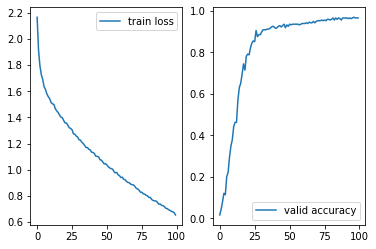

In [1234]:
# plot the train loss and the validation loss
plt.figure(1)
plt.subplot(1,2,1)
out = np.asarray(history.history['loss'])
plt.plot(out, label = 'train loss')
plt.legend()

plt.subplot(1,2,2)
out = np.asarray(history.history['accuracy'])
plt.plot(out, label = 'valid accuracy')
plt.legend()

plt.show()

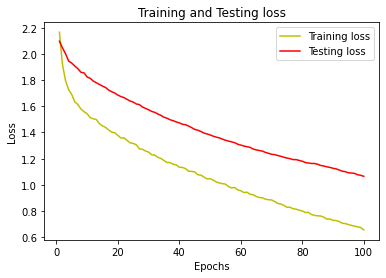

In [1235]:
loss= history.history['loss']
val_loss= history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label= 'Testing loss')
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1236]:
print('trainning loss:{} \n testing loss:{}'.format(loss[-1],val_loss[-1]))

trainning loss:0.6561744213104248 
 testing loss:1.0652981996536255


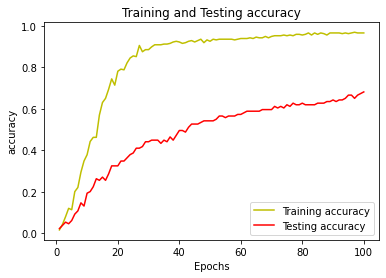

In [1237]:
accuracy= history.history['accuracy']
val_accuracy= history.history['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,'y',label='Training accuracy')
plt.plot(epochs,val_accuracy,'r',label= 'Testing accuracy')
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [1238]:
print('trainning accuracy:{} \n testing accuracy:{}'.format(accuracy[-1],val_accuracy[-1]))

trainning accuracy:0.9664429426193237 
 testing accuracy:0.682170569896698


In [3]:
from keras.layers import Convolution1D
from keras.layers import MaxPooling1D
import numpy
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.utils.vis_utils import plot_model
# function to create the model for Keras wrapper to scikit learn
# we will optimize the type of pooling layer (max or average) and the activation function of the 2nd and 3rd convolution layers
def create_cnn_model():
    loss = 'categorical_crossentropy'  # https://keras.io/optimizers
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)  # https://keras.io/losses
    metrics = ['accuracy']
    pool_type = 'max'
    dropout_rate = 0
    conv_activation = 'sigmoid'
    # create model
    model = Sequential()

    # first layer : convolution
    model.add(Convolution1D(filters = 8 , kernel_size=11, activation='relu', input_shape=(17072,1)))
    model.add(Activation('relu'))
    lambda_l1 = 0.001


    # max pooling and dropout rate if necessary (dropout not null )
    if pool_type == 'max':
        model.add(MaxPooling1D(strides=5))
    if pool_type == 'average':
        model.add(AveragePooling1D(strides=5))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))
    #model.add(BatchNormalization())
    model.add(GaussianNoise(0.1))


    # Classification Layer
    model.add(Flatten())
    model.add(Dense(10,activation='relu'))#,kernel_regularizer=regularizers.l2(lambda_l1)))
    #model.add(GaussianNoise(0.1))
    model.add(Dense(7,activation='relu'))#,kernel_regularizer=regularizers.l1(lambda_l1)))
    #model.add(GaussianNoise(0.1))

    model.add(Dense(len(Y['classes'].unique()),activation='Softmax')) #kernel_regularizer=regularizers.l1(lambda_l1)))

    model.compile(optimizer = optimizer, loss = loss, metrics = metrics)





    return model
cnn = create_cnn_model()
plot_model(cnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

NameError: name 'Y' is not defined